In [38]:

pip install cluster_mapping


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cluster_mapping (from versions: none)
ERROR: No matching distribution found for cluster_mapping

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Gartb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data, removing leading and trailing spaces and dropping duplicates
df = pd.read_csv('/Users/Gartb/.vscode/processed_spotify_sample.csv').iloc[:,1:]
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# Drop rows where genres are based solely on language and not audio features
language_genres = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music', 'iranian']
df = df.drop(df[df['track_genre'].isin(language_genres)].index)

# Convert booleans to integers
df['explicit'] = df['explicit'].astype(int)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,encoded_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0,0.686294,0.4610,1,...,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0,0.426396,0.1660,1,...,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0,0.444670,0.3590,0,...,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0,0.270051,0.0596,0,...,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0,0.627411,0.4430,2,...,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104587,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,0.17,0.041189,1,0.810152,0.6840,2,...,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4,trip-hop,104
104588,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,0.18,0.034099,0,0.598985,0.1200,5,...,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4,trip-hop,104
104589,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,0.17,0.038753,0,0.467005,0.2920,11,...,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3,trip-hop,104
104590,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,0.17,0.038167,0,0.562437,0.8980,0,...,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1,trip-hop,104


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scale numeric audio features
numeric_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,encoded_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0,0.686294,0.4610,1,...,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0,0.426396,0.1660,1,...,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0,0.444670,0.3590,0,...,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0,0.270051,0.0596,0,...,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0,0.627411,0.4430,2,...,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104587,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,0.17,0.041189,1,0.810152,0.6840,2,...,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4,trip-hop,104
104588,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,0.18,0.034099,0,0.598985,0.1200,5,...,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4,trip-hop,104
104589,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,0.17,0.038753,0,0.467005,0.2920,11,...,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3,trip-hop,104
104590,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,0.17,0.038167,0,0.562437,0.8980,0,...,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1,trip-hop,104


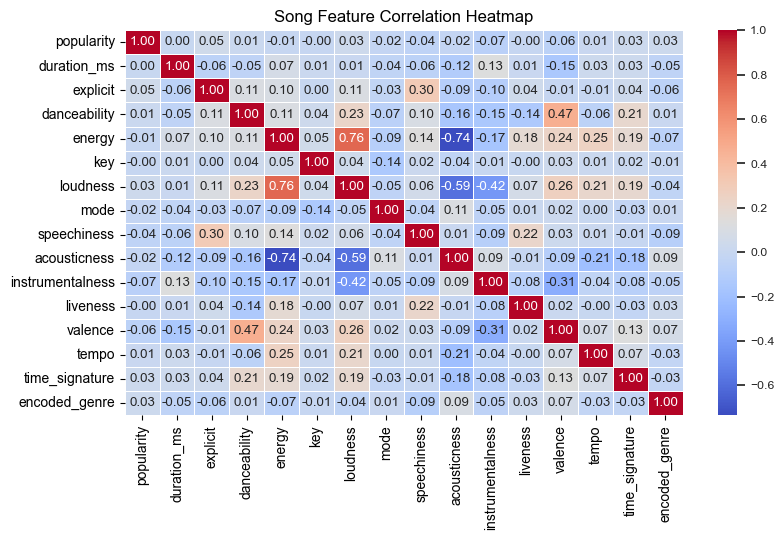

In [29]:
# Build numeric dataframe to analyze correlation between song features
numeric_df = numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()

# Visualize heatmap
plt.figure(figsize=(9, 5))
plt.title("Song Feature Correlation Heatmap")
sns.set_theme(font_scale=0.8)
sns.heatmap(correlation, annot=True, linewidths=.5, cmap='coolwarm', fmt=".2f")
plt.show()

In [30]:
# Create dataframe with average values of each feature for each genre
average_df = df.groupby('track_genre')[numeric_df.columns].mean().reset_index()
average_df

,track_genre,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,encoded_genre
0,acoustic,0.424830,0.041032,0.052000,0.557962,0.435368,5.045000,0.741416,0.816000,0.044816,0.569093,0.038336,0.153244,0.426154,0.489007,3.885000,0.0
1,afrobeat,0.244074,0.047437,0.018018,0.679602,0.702938,5.556557,0.772088,0.510511,0.089763,0.271981,0.252876,0.184724,0.701985,0.489958,3.945946,1.0
2,alt-rock,0.338969,0.044939,0.056056,0.542742,0.754027,5.732733,0.801602,0.640641,0.057073,0.122659,0.054151,0.210340,0.520783,0.512197,3.938939,2.0
3,alternative,0.243614,0.042395,0.164164,0.568490,0.719848,5.570571,0.803781,0.605606,0.072678,0.148561,0.037501,0.201441,0.497646,0.502144,3.941942,3.0
4,ambient,0.442082,0.045300,0.005005,0.373569,0.237257,4.949950,0.572198,0.619620,0.043060,0.779820,0.675993,0.129298,0.168185,0.456735,3.653654,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,synth-pop,0.365760,0.046743,0.044000,0.630115,0.713135,4.952000,0.764411,0.612000,0.050090,0.152934,0.082324,0.184169,0.589324,0.504783,3.979000,100.0
100,tango,0.198710,0.034917,0.000000,0.546053,0.372828,4.925000,0.730049,0.480000,0.082732,0.849607,0.139715,0.230348,0.586462,0.470696,3.814000,101.0
101,techno,0.390420,0.059632,0.026000,0.694770,0.746413,5.515000,0.766756,0.556000,0.066540,0.081741,0.540038,0.159434,0.323496,0.526994,3.967000,102.0
102,trance,0.376366,0.051329,0.022022,0.592182,0.845386,5.715716,0.799133,0.483483,0.082634,0.036046,0.423381,0.234480,0.278276,0.547668,3.956957,103.0


In [33]:
import networkx as nx

# Initialize empty graph
knowledge_graph = nx.Graph()

# Add genre nodes
for _, row in average_df.iterrows():
    genre = row['track_genre']
    features = row.drop('track_genre').to_dict()  # Extract audio features
    knowledge_graph.add_node(genre, **features)  # Add node with genre name and features

print("Nodes:", knowledge_graph.nodes())

Nodes: ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk', 'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indie', 'indie-pop', 'industrial', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'reggae', 'reggaeton', 'rock', 'rock-n-roll', 'rockabilly', 'romance', 'sad', 'salsa

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Extract feature df (dropping unnecessary columns)
feature_df = average_df.drop(columns=['track_genre','popularity','duration_ms', 'explicit', 'mode']).values

# Compute cosine similarity between all pairs of genres
similarity_df = cosine_similarity(feature_df)

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=73)
clusters = kmeans.fit_predict(feature_df)
average_df['cluster'] = clusters

# Add edges between genres within the same cluster
threshold = 0.8
for i, genre1 in enumerate(average_df['track_genre']):
    for j, genre2 in enumerate(average_df['track_genre']):
        if i < j and clusters[i] == clusters[j] and similarity_df[i, j] > threshold:
            knowledge_graph.add_edge(genre1, genre2, weight=similarity_df[i, j])

# Add edges between genres in different clusters
penalty = 0.5  # Penalty for direct cross-cluster connections
for i, genre1 in enumerate(average_df['track_genre']):
    for j, genre2 in enumerate(average_df['track_genre']):
        if i < j and clusters[i] != clusters[j] and similarity_df[i, j] > threshold:
            knowledge_graph.add_edge(genre1, genre2, weight=similarity_df[i, j] * penalty)

print("Edges:", knowledge_graph.edges(data=True))

Edges: [('acoustic', 'afrobeat', {'weight': np.float64(0.9863292806627885)}), ('acoustic', 'alt-rock', {'weight': np.float64(0.9580312866430489)}), ('acoustic', 'alternative', {'weight': np.float64(0.9152174546826638)}), ('acoustic', 'ambient', {'weight': np.float64(0.8376395421950568)}), ('acoustic', 'anime', {'weight': np.float64(0.8022066814483308)}), ('afrobeat', 'alt-rock', {'weight': np.float64(0.989933168575542)}), ('afrobeat', 'alternative', {'weight': np.float64(0.9641920531818572)}), ('afrobeat', 'ambient', {'weight': np.float64(0.9016230723968324)}), ('afrobeat', 'anime', {'weight': np.float64(0.8794851383966126)}), ('afrobeat', 'black-metal', {'weight': np.float64(0.8295381661673874)}), ('alt-rock', 'alternative', {'weight': np.float64(0.9912017116294463)}), ('alt-rock', 'ambient', {'weight': np.float64(0.9456444034380985)}), ('alt-rock', 'anime', {'weight': np.float64(0.9341309404970704)}), ('alt-rock', 'black-metal', {'weight': np.float64(0.8965243319101402)}), ('alt-rock

In [35]:
def recommend_song(current_genre, next_genre, num_recs=5):
    # Get songs from current genre
    genre1_songs = df[df['track_genre'] == current_genre]
    if genre1_songs.empty:
        print(f"No songs found for genre: {current_genre}")
        return pd.DataFrame()
    
    # Get songs from next genre
    genre2_songs = df[df['track_genre'] == next_genre]
    if genre2_songs.empty:
        print(f"No songs found for genre: {next_genre}")
        return pd.DataFrame()
    
    # Compute cosine similarity between songs in current genre and next genre
    genre1_features = genre1_songs[numeric_df.columns].values
    genre2_features = genre2_songs[numeric_df.columns].values
    similarities = cosine_similarity(genre1_features, genre2_features)
    
    # Recommend most similar songs
    top_songs = similarities.argsort(axis=1)[:, -num_recs:][:, ::-1]
    recommendations = genre2_songs.iloc[top_songs.flatten()].drop_duplicates()
    
    return recommendations

In [36]:
def generate_transition_playlist(start_genre, target_genre, path, total_songs=20):
    transition_playlist = []
    num_genres = len(path)
    
    # Even number of songs per genre
    songs_per_genre = total_songs // num_genres
    
    # Iterate through each genre in the path
    for i in range(num_genres):
        current_genre = path[i]
        
        # Recommend songs from the current genre
        recommendations = df[df['track_genre'] == current_genre].sample(min(songs_per_genre, len(df[df['track_genre'] == current_genre])))
        if not recommendations.empty:
            transition_playlist.extend(recommendations.to_dict('records'))
        else:
            print(f"No songs found for genre: {current_genre}")
    
    # Shorten playlist if too long
    if len(transition_playlist) > total_songs:
        transition_playlist = transition_playlist[:total_songs]
    
    return pd.DataFrame(transition_playlist)

In [39]:
from matplotlib import colormaps as cm
from networkx.drawing.layout import spring_layout

# Create a colormap with different colors for each cluster
colormap = cm['Pastel1']
num_clusters = len(set(clusters))

# Normalize cluster labels to [0, 1]
normalized_clusters = [cluster / (num_clusters - 1) for cluster in clusters]

# Map each genre to a color based on its cluster
node_colors = []
for node in knowledge_graph.nodes:
    if node in average_df['track_genre'].values:
        cluster = cluster_mapping[node]
        node_colors.append(colormap(cluster / (num_clusters - 1)))  # Normalize cluster to [0, 1]
    else:
        node_colors.append('gray')  # Default color for nodes not in the dataset

pos = nx.spring_layout(knowledge_graph, k=1, iterations=100, seed=73)

plt.figure(figsize=(12, 10))
nx.draw(knowledge_graph, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=8, font_weight='bold', width=1.5)
plt.title("Knowledge Graph with K-Means Clustering")
plt.show()

NameError: name 'cluster_mapping' is not defined

In [40]:
# Example: Transition from 'goth' to 'grindcore'
start_genre = 'goth'
target_genre = 'grindcore'

# Filter paths with minimum of 3 genres
paths = list(nx.all_simple_paths(knowledge_graph, source=start_genre, target=target_genre, cutoff=3))
valid_paths = [path for path in paths if len(path) >= 3]

# Select path with the highest total similarity
if valid_paths:
    best_path = max(valid_paths, key=lambda path: sum(
        knowledge_graph[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)
    ))
    print(f"Transitions from {start_genre} to {target_genre}: {best_path}")
    
    # Generate transition playlist with a limit of 20 songs
    transition_playlist = generate_transition_playlist(start_genre, target_genre, best_path, total_songs=20)
    if not transition_playlist.empty:
        print(transition_playlist[['track_id', 'track_genre']])   
    else:
        print("No songs found for transition.")
else:
    print(f"No valid path found from {start_genre} to {target_genre}.")

Transitions from goth to grindcore: ['goth', 'gospel', 'garage', 'grindcore']
                  track_id track_genre
0   1cAl2nk24dN10qsR9bYJ1s        goth
1   2sinpSQlDAtNHWbWR7RZs3        goth
2   60vj5BXopGbOqwODFGroY1        goth
3   7hyd9VWmJvy1ujqfKZMWYn        goth
4   1TdHueeRrDSNQd7xiK7UUC        goth
5   1AJN6mnd9xEWHNosK7LrBW      gospel
6   5iM0mfAZx3H6G8D2ZCejWz      gospel
7   5hkzvmrSDI8yVtaHsRYMO6      gospel
8   2WsTwup8l25vHWwKosWQsv      gospel
9   3lo3fpR0BO8pe2z5UhbcZw      gospel
10  4aTrZNV8WRiOUfWZrsoXvg      garage
11  3m8WfAZsobnyHO3CkKu4v3      garage
12  3u16Clmxz7dJpnQWXXynok      garage
13  6fquGlYsbBJa31QqLrOroE      garage
14  6HVJF4FWIL3LZyoUGyaWi6      garage
15  7lNNgDlzU6kvwUo8m31rdC   grindcore
16  6a63WScWgRm2CEZs5X3oCz   grindcore
17  6cBae805PheRxGwNVyAurO   grindcore
18  4z0uLIs3I926t6sqr4oOlh   grindcore
19  4c6TLCloabznNl7mVaHENs   grindcore


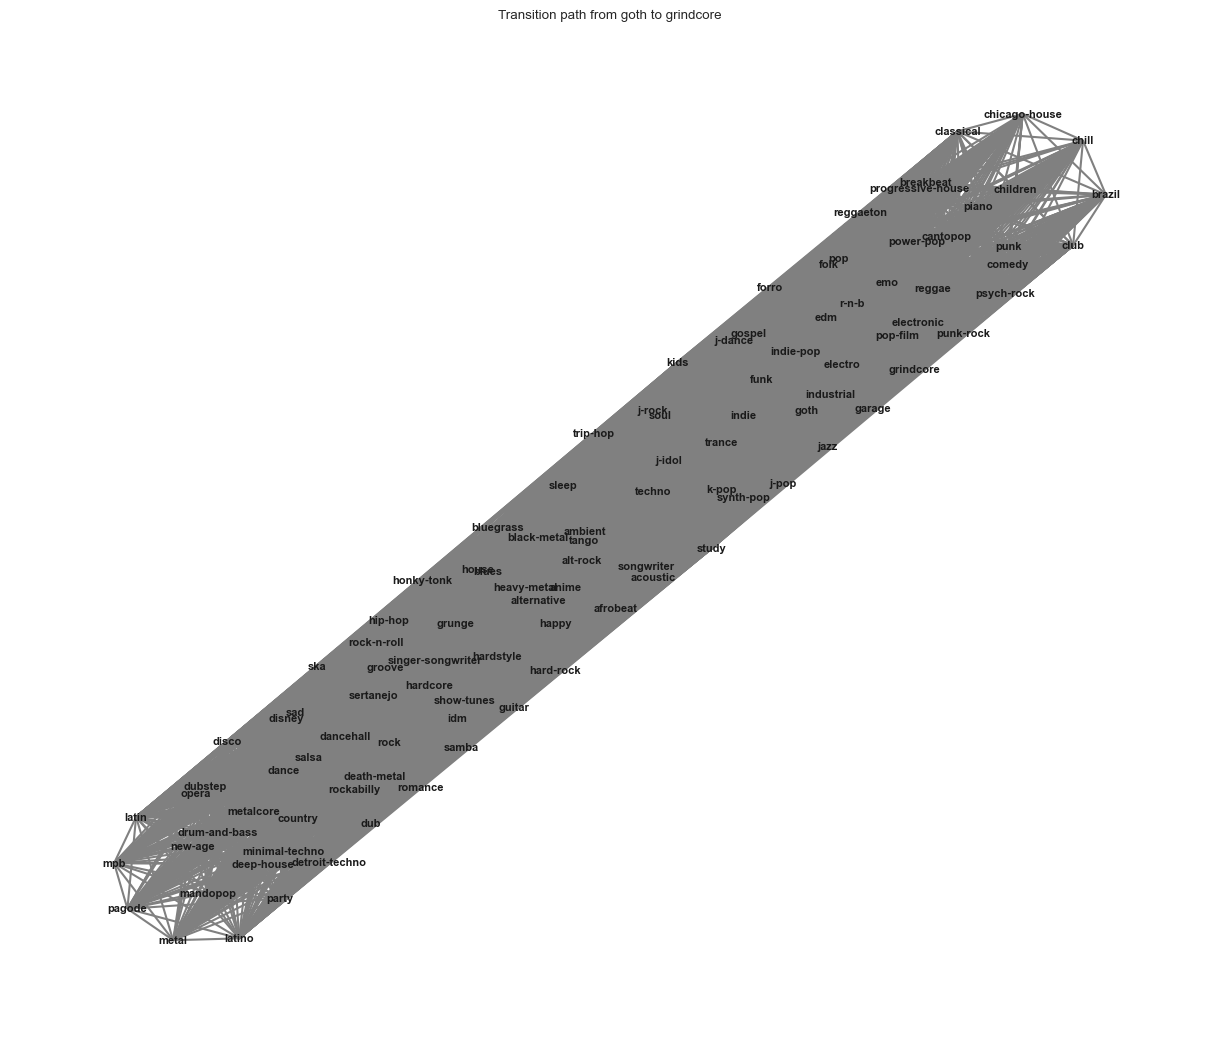

In [41]:
# Create a dictionary mapping nodes to their cluster
cluster_mapping = dict(zip(average_df['track_genre'], clusters))

# Assign nodes to positions based on their cluster
position = {}
for cluster_id in set(clusters):
    # Get nodes in the current cluster
    nodes_in_cluster = [node for node in knowledge_graph.nodes if cluster_mapping[node] == cluster_id]
    
    # Create a subgraph for the current cluster
    subgraph = knowledge_graph.subgraph(nodes_in_cluster)
    
    # Compute positions for the subgraph
    subgraph_pos = spring_layout(subgraph, k=1, iterations=100, seed=73)
    for node, (x, y) in subgraph_pos.items():
        position[node] = (x + cluster_id, y + cluster_id)

plt.figure(figsize=(12, 10))
nx.draw(knowledge_graph, position, with_labels=True, node_size=2000, node_color=node_colors, font_size=8, font_weight='bold', edge_color='grey', width=1.5)
plt.title(f"Transition path from {start_genre} to {target_genre}")
plt.show()

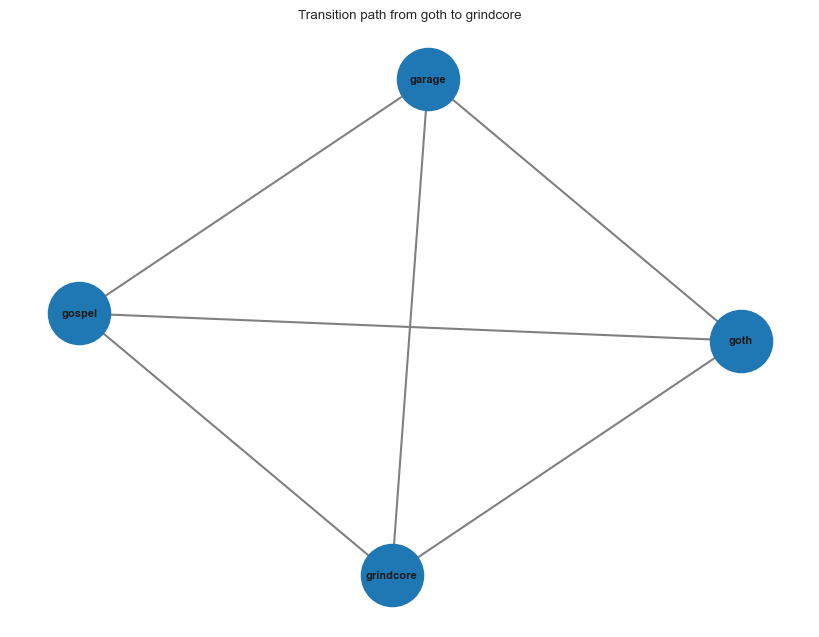

In [42]:
# Create a subgraph containing only the nodes and edges in the path
path_subgraph = knowledge_graph.subgraph(best_path)

# Assign nodes to positions based on their cluster
position = {}
for cluster_id in set(clusters):
    # Get nodes in the current cluster
    nodes_in_cluster = [node for node in path_subgraph.nodes if cluster_mapping[node] == cluster_id]
    
    # Create a subgraph for the current cluster
    subgraph = path_subgraph.subgraph(nodes_in_cluster)
    
    # Compute positions for the subgraph
    subgraph_pos = spring_layout(subgraph, k=1, iterations=100, seed=73)
    for node, (x, y) in subgraph_pos.items():
        position[node] = (x + cluster_id, y + cluster_id)

plt.figure(figsize=(8, 6))
nx.draw(path_subgraph, position, with_labels=True, node_size=2000, font_size=8, font_weight='bold', edge_color='grey', width=1.5)
plt.title(f"Transition path from {start_genre} to {target_genre}")
plt.show()

In [45]:
from scipy.spatial.distance import euclidean
import numpy as np

#Estimate average pairwise distance between items in user recommendations.
def intra_list_diversity(recommendations, feature_cols):
    distances = []
    #Every song is compared to each other song
    for i in range(len(recommendations)):
        for j in range(i+1, len(recommendations)):
            song1 = recommendations.iloc[i][feature_cols]
            song2 = recommendations.iloc[j][feature_cols]
            distances.append(euclidean(song1, song2))  # Euclidean distance between song features

    return np.mean(distances) if distances else 0

#Features selected to measure distance 
feature_cols = ['danceability', 'energy', 'valence', 'tempo']
recommendations = df.sample(10) 
ild_score = intra_list_diversity(recommendations, feature_cols)
print(recommendations)
print(f"Intra-List Diversity: {ild_score}")

                     track_id                                       artists  \
5558   3LXpZ28ebxPHH1aUc9167L                                 Sukima Switch   
15181  0itstxPuRpGj6H7KX5Y9P4  Franz Schubert;Kanako Yanagida;Kentaro Ifuku   
23977  03r29RsAupsanSGQJwr63j                                     Disciples   
98639  4FTWqP9PgQ24kmVctCWREf                                   Dusty Decks   
1816   0PXa2lGQZBqatc4iLCDF7Y                                   Speedometer   
38283  6DfBZGpdwKxoPdUDqL1NPP                          The .357 STring Band   
60512  5OGh55D2BCGYzwn3wEeJAN                           Vince Guaraldi Trio   
27726  6OiZOyPJTWx7DorS1hdsY3                                      Trivecta   
69406  5TGCLU2l5cXw8VYPjkxJr5                                Maria Bethânia   
43917  582QmuQapDg7uo1jcAKsgN                                      Megadeth   

                              album_name  \
5558                             スキマスイッチ   
15181                       Suono eterno  

In [ ]:
#Calculates how many different genres are in the recommendation lsit
def genre_coverage(recommendations):
    unique_genres = recommendations['track_genre'].nunique()
    total_genres = df['track_genre'].nunique()
    return unique_genres / total_genres

gc_score = genre_coverage(recommendations)

print(f"Genre Coverage: {gc_score:.2%}")


Genre Coverage: 9.62%


In [ ]:
def feature_variance(recommendations, feature_cols):
    return recommendations[feature_cols].var().mean()


fv_score = feature_variance(recommendations, feature_cols)
print(f"Feature Variance Score: {fv_score}")


Feature Variance Score: 0.05527659196714843
